<a href="https://colab.research.google.com/github/monsieurupanshu/Data-Analysis-of-Astronomical-Data/blob/main/Astronomical_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Peeking
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
208,17920,0.001110,0.0106,11.660,2,Blue,B
129,2731,0.000437,0.0856,18.090,0,Red,M
194,3523,0.005400,0.3190,12.430,1,Red,M
95,11250,672.000000,6.9800,-2.300,3,Blue-White,A
116,4015,282000.000000,1534.0000,-11.390,5,Red,K
56,3660,363000.000000,1673.0000,-11.920,5,Red,M
151,8945,38.000000,2.4870,0.120,3,Blue-White,A
58,3752,209000.000000,955.0000,-11.240,5,Red,M
211,10012,552.000000,5.8560,0.013,3,Blue-White,A
210,22350,12450.000000,6.3600,-3.670,3,Blue-White,B


In [3]:
# General Info about Dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
# Create a Directory to save the Visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'/content/{folder_name}/'

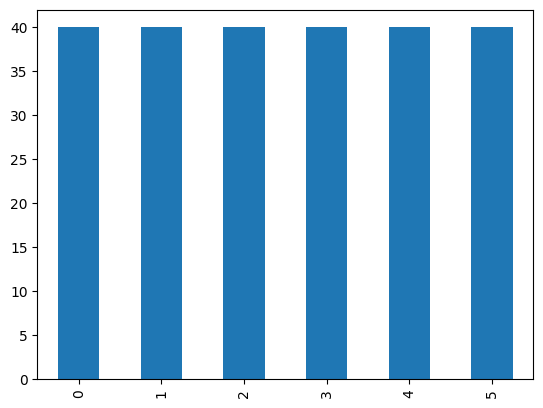

In [5]:
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

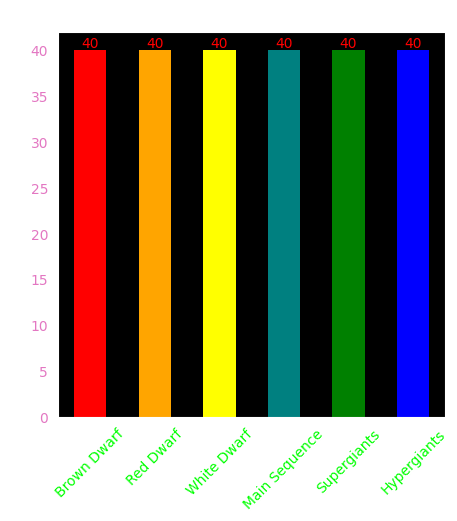

In [6]:
# Bar Chart to Visualize the Count of Stars with Respective Type
plt.figure(figsize=(5,5))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'teal','green','blue'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize Star Count per Star Type', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize = 11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.savefig(base_dir+'barplot_star_count.png')
plt.show()

<ipython-input-7-05857e272aee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


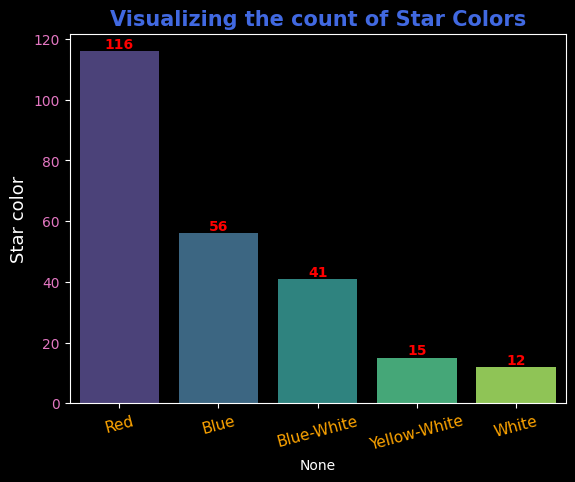

In [7]:
# Visualizing the Star Color Data
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
for container in ax.containers:
    ax.bar_label(container, color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()

In [8]:
# Gist of the Data
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


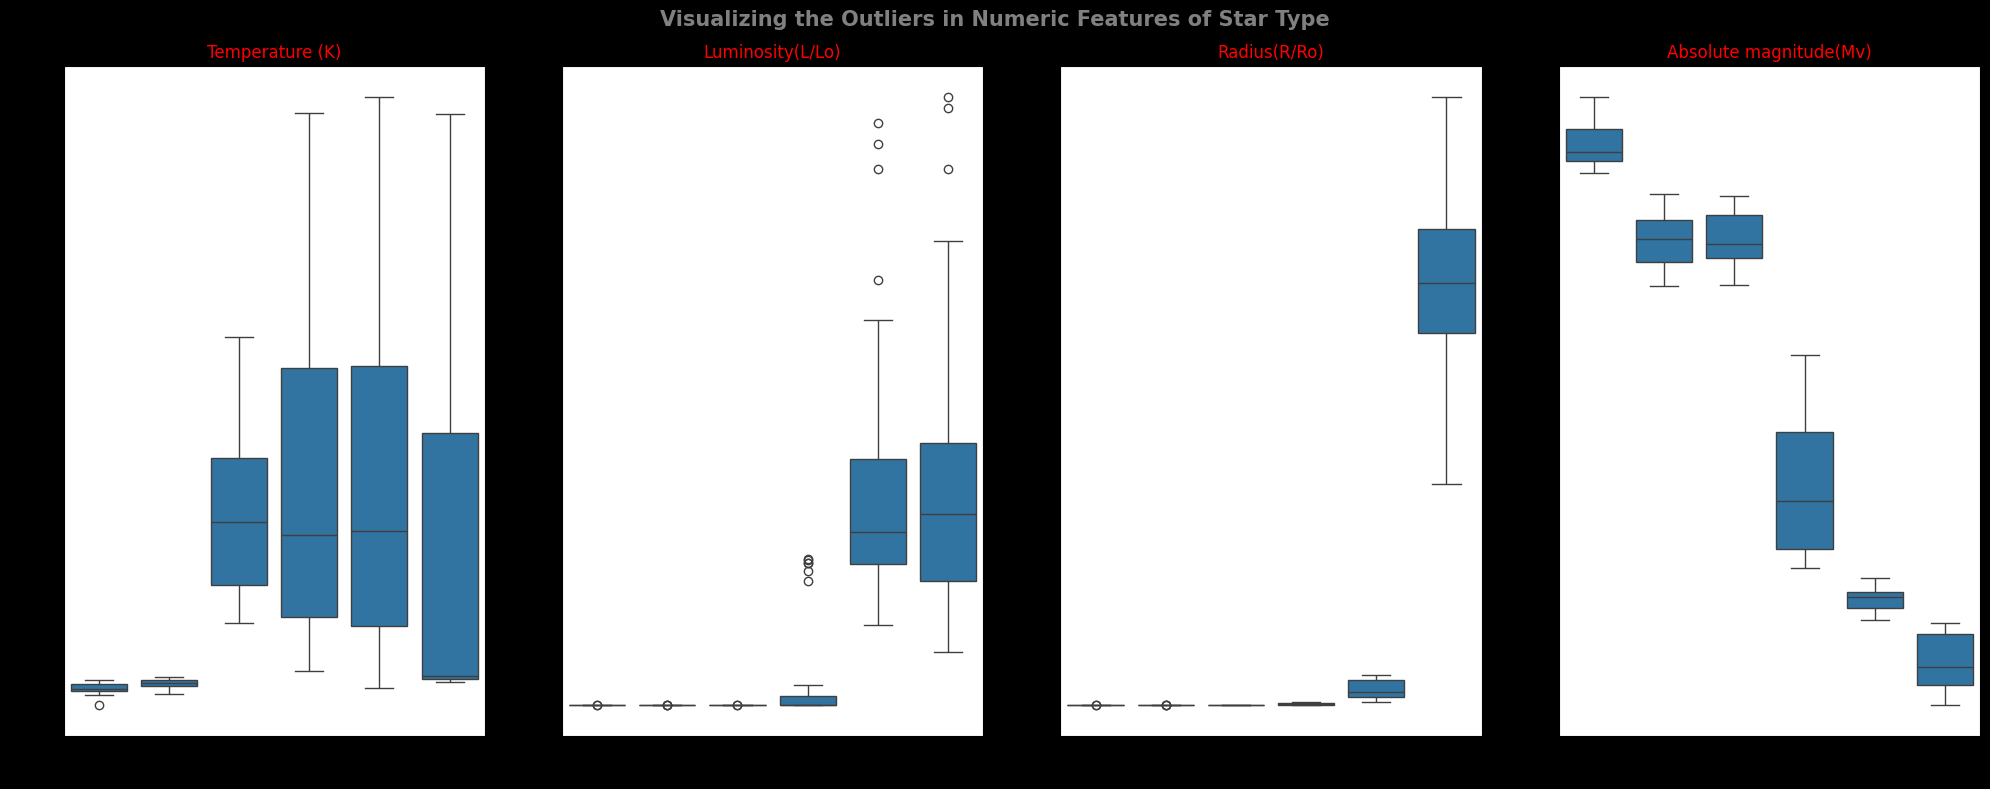

In [9]:
# Visualize Outliers
plt.figure(figsize=(20,8))
plt.style.use('dark_background')
plt.subplots_adjust(top=0.85)
plt.style.use('default')
plt.suptitle('Visualizing the Outliers in Numeric Features of Star Type',
             color='grey', weight='bold',fontsize=15)

for i in range(4):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

plt.tight_layout()
plt.savefig(base_dir+'boxplot_star-type.png')
plt.show()

In [10]:
def line_subplot(star_df, colors, i):
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:, i], color=colors[i])
  plt.title(star_df.columns[i], color='red')

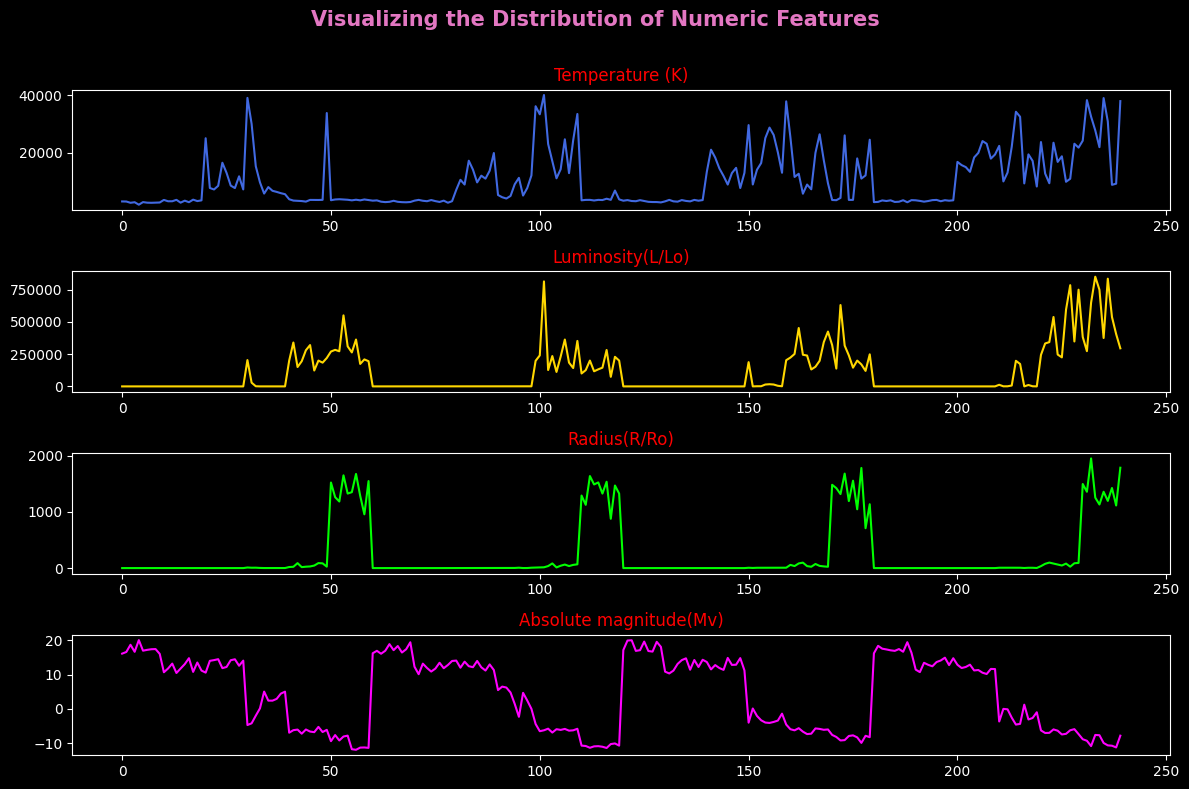

In [11]:
colors = ['royalblue', 'gold', 'lime', 'magenta']

plt.style.use('dark_background')

plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the Distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

for i in range(4):
  line_subplot(star_df, colors, i)

plt.tight_layout()

plt.savefig(base_dir+'line_subplot.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

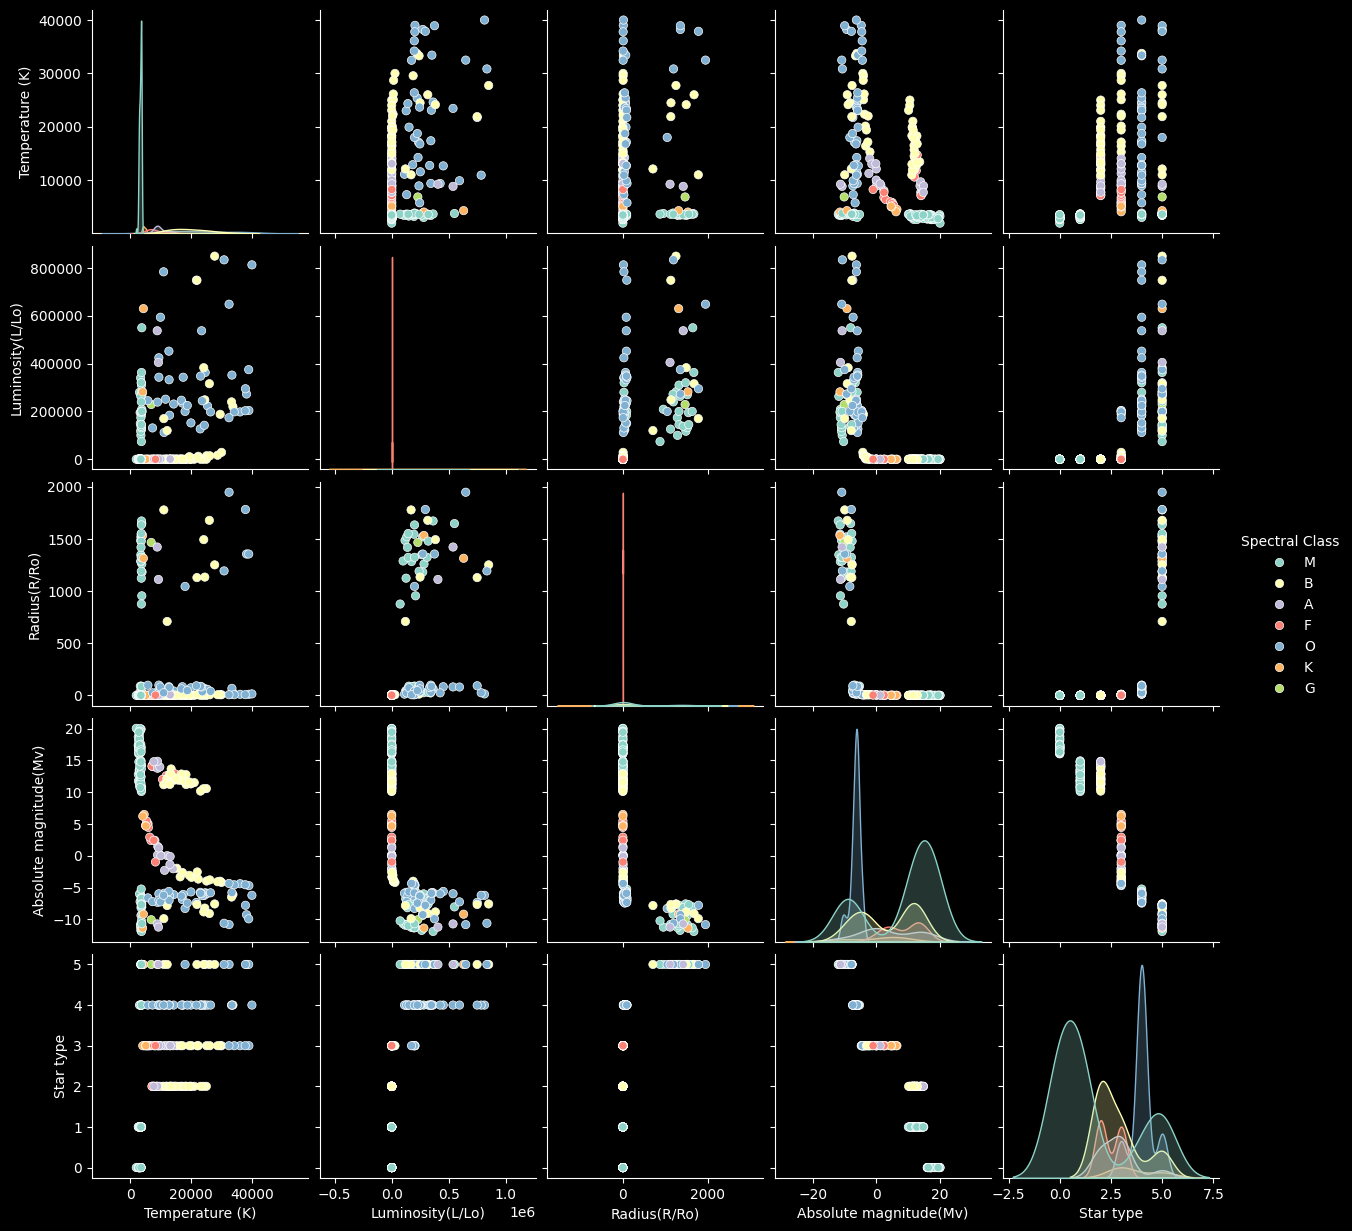

In [12]:
# Pairplot-Scatter
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show

In [14]:
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

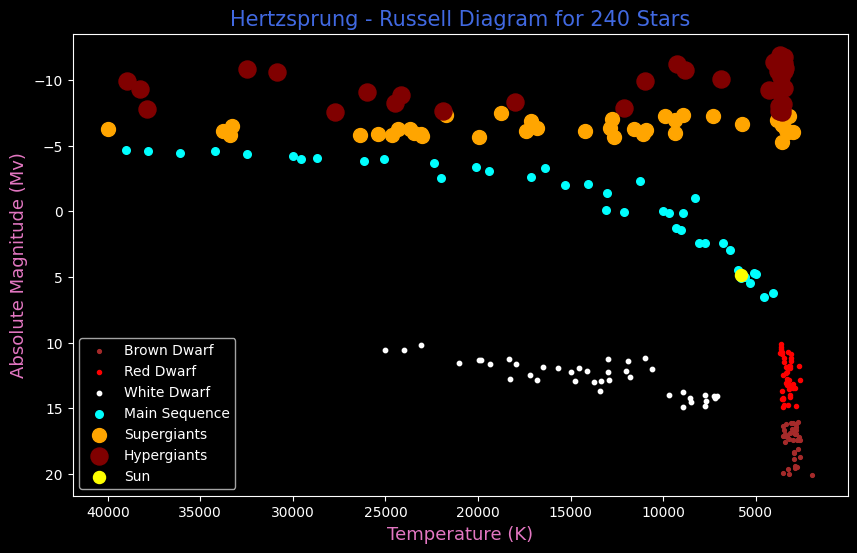

In [15]:
# HERTZSPRUNG-RUSSELL Diagram

axes = []
labels = set()

plt.figure(figsize=(10,6))

for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])

    axes.append(ax)

    labels.add(properties['label'])

  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

plt.legend(handles=axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig(base_dir+'hr_diagram.png')
plt.show()